Workflow:
- read in messages
- tokenize messages / preprocess - this involves: identifying emotes (e.g. pokiHype), emoticons (<3, :), etc), slang (sadge, etc)
- put messages into some kind of sentiment analyzer 

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv("./doublelift.csv")

In [6]:
msgs = df['message']

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [8]:
posEmotesSlang = ['pokihype', 'pokiw', 'pokiwater', 'pokint', 'pokiwow', 'pokiya', 'pokidrool',
                 'pokio', 'pokifree', 'pokisub', 'pokigift', 'pokigood', 'pokiaww',
                  'pokihey', 'pokishy', 'pokih', 'pokil', 'pokihypers', 'pokimoney', 'pokiflex',
                  'pogu', 'pog', 'poggers', 'pogchamp',
                 ]

In [9]:
negEmotesSlang = ['sadge', 'monkas', 'pokiknife', 'pokigun', 'pokiyikes', 
                 'pokicry', 'pokiweird', 'weirdchamp', 'monkaw', 'monka','inting', 'malding', ]

In [10]:
to_extend_lexicon_file="./twitch_lexicon.txt"

In [11]:
with open(to_extend_lexicon_file, mode='w') as f:
    for entry in posEmotesSlang:
        outString = entry + "\t" + "1.0" + "\n"
        f.write(outString)
    for entry in negEmotesSlang:
        outString = entry + "\t" + "-1.0" + "\n"
        f.write(outString)

In [12]:
# add on the original lexicon file
lex_new = open(to_extend_lexicon_file, "r")
data1 = lex_new.read()
lex_new.close()

lex_old = open("../anaconda3/envs/nlp/lib/python3.8/site-packages/vaderSentiment/vader_lexicon.txt", "r")
data2 = lex_old.read()
lex_old.close()

combined_data = data1 + data2

combined_lex = open("../anaconda3/envs/nlp/lib/python3.8/site-packages/vaderSentiment/vader_lexicon_extended.txt", "w")
combined_lex.write(combined_data)
combined_lex.close()

In [13]:
analyzer = SentimentIntensityAnalyzer("vader_lexicon_extended.txt")

In [14]:
to_concat = {'neg':[], 'neu':[], 'pos':[], 'compound':[]}
for msg in msgs:
    score = analyzer.polarity_scores(msg)
    for key, val in score.items():
        to_concat[key].append(val)

to_concat_df = pd.DataFrame(to_concat)

full_df = pd.concat([df, to_concat_df], axis=1)

In [15]:
full_df

,dt,channel,username,message,neg,neu,pos,compound
0,2021-05-01 15:54:21,doublelift,flokivalhalla,anyone got a tv series to recommend watching ?,0.000,0.762,0.238,0.3612
1,2021-05-01 15:54:24,doublelift,pocketrhinolol,hi i hope ur having a nice day,0.000,0.513,0.487,0.6908
2,2021-05-01 15:54:24,doublelift,hhill18,_song,0.000,1.000,0.000,0.0000
3,2021-05-01 15:54:24,doublelift,budgetlunge,kaisa Pog,0.000,0.333,0.667,0.2500
4,2021-05-01 15:54:24,doublelift,deathhoodshots,TARZANED,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...
2017,2021-05-01 19:07:21,doublelift,lollaswin,dn,0.000,1.000,0.000,0.0000
2018,2021-05-01 19:07:24,doublelift,solsynchros,have a goodnight dl,0.000,1.000,0.000,0.0000
2019,2021-05-01 19:07:28,doublelift,hugh_lovett,"Smoge same, degen sleep schedule",0.000,1.000,0.000,0.0000
2020,2021-05-01 19:07:51,doublelift,jas0nbao,gn,0.000,0.000,1.000,0.2960


In [17]:
full_df.to_csv('doublelift_chat_with_sentiment.csv')

In [22]:
doublelift_df = pd.read_csv('doublelift_chat_with_sentiment.csv')
t1_df = pd.read_csv('t1_chat_with_sentiment.csv')
poki_df = pd.read_csv('poki_chat_with_sentiment.csv')

In [23]:
import matplotlib.pyplot as plt

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f9e671fd1f0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f9e671fd040>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f9e671fd670>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f9e671fd970>}

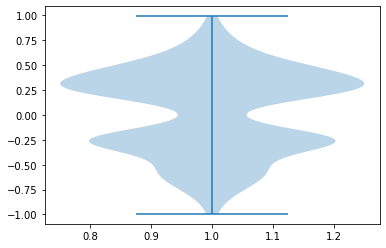

In [24]:
# first, visualize the differences in sentiment:
plt.violinplot([x for x in t1_df['compound'] if x != 0])

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f9e671c9e50>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f9e671f4d00>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f9e671bb310>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f9e671bb610>}

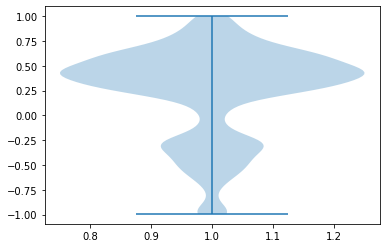

In [25]:
plt.violinplot([x for x in poki_df['compound'] if x != 0])

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f9e67243ac0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f9e6725a100>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f9e67243f40>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f9e671b8280>}

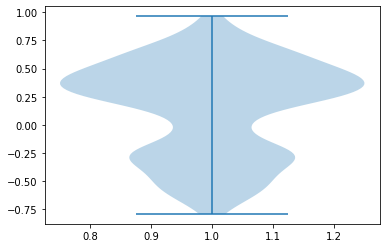

In [26]:
plt.violinplot([x for x in doublelift_df['compound'] if x != 0])

In [ ]:
# filter out "noise" events that are just 0s

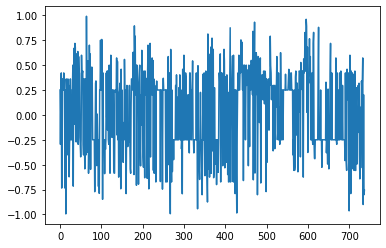

In [44]:
# now, show over time
plt.plot([x for x in t1_df['compound'] if x != 0])

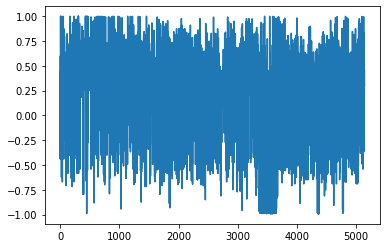

In [59]:
plt.plot([x for x in poki_df['compound'] if x != 0])

In [50]:
import numpy as np

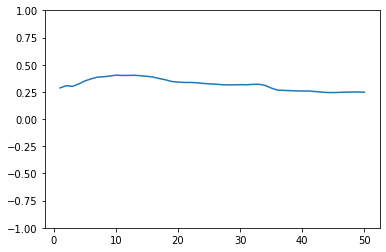

In [55]:
msgs_no_neutral = [x for x in poki_df['compound'] if x != 0]
msg_averages = []
for i in range(int(len(msgs_no_neutral) / 50)):
    msg_averages.append(np.mean(msgs_no_neutral[i:i*50]))
plt.plot(msg_averages)
plt.ylim([-1, 1])
plt.show()

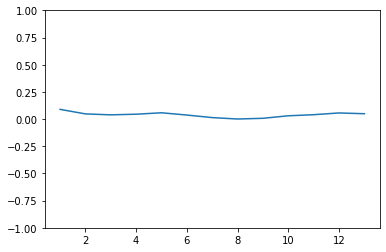

In [58]:
msgs_no_neutral = [x for x in t1_df['compound'] if x != 0]
msg_averages = []
for i in range(int(len(msgs_no_neutral) / 50)):
    msg_averages.append(np.mean(msgs_no_neutral[i:i*50]))
plt.plot(msg_averages)
plt.ylim([-1, 1])
plt.show()

In [47]:
# investigate the negative options:
poki_df[poki_df['compound'] < -0.9].iloc[100:130]

,Unnamed: 0,dt,channel,username,message,neg,neu,pos,compound
11206,11206,2021-04-18 16:20:01,pokimane,widepeeposergio,WideMimi HYPERCLAP NO STREAMER WideMimi HYPERC...,0.494,0.506,0.0,-0.9614
11208,11208,2021-04-18 16:20:04,pokimane,awesomehasser1945,WideHardo Clap NO STREAMER WideHardo Clap NO S...,0.485,0.515,0.0,-0.9939
11211,11211,2021-04-18 16:20:05,pokimane,alexgris_,WideMimi HYPERCLAP NO STREAMER WideMimi HYPERC...,0.494,0.506,0.0,-0.9761
11213,11213,2021-04-18 16:20:05,pokimane,rektmate23,WideHardo Clap NO STREAMER WideHardo Clap NO S...,0.494,0.506,0.0,-0.9883
11224,11224,2021-04-18 16:20:09,pokimane,pogi52,WideHardo Clap NO STREAMER WideHardo Clap NO S...,0.494,0.506,0.0,-0.9883
11231,11231,2021-04-18 16:20:14,pokimane,pogi52,WideHardo Clap NO STREAMER WideHardo Clap NO S...,0.488,0.512,0.0,-0.9883
11232,11232,2021-04-18 16:20:14,pokimane,awesomehasser1945,WideHardo Clap NO STREAMER WideHardo Clap NO S...,0.494,0.506,0.0,-0.9899
11239,11239,2021-04-18 16:20:19,pokimane,awesomehasser1945,WideHardo Clap NO STREAMER WideHardo Clap NO S...,0.494,0.506,0.0,-0.9883
11249,11249,2021-04-18 16:20:27,pokimane,fur10us_gg,WideMimi HYPERCLAP NO STREAMER WideMimi HYPERC...,0.494,0.506,0.0,-0.9805
11252,11252,2021-04-18 16:20:28,pokimane,drakorycz,WideHardo Clap NO STREAMER WideHardo Clap NO S...,0.494,0.506,0.0,-0.9883


In [41]:
poki_df.iloc[11237].message

'WideMimi HYPERCLAP NO STREAMER WideMimi HYPERCLAP NO STREAMER WideMimi HYPERCLAP NO STREAMER WideMimi HYPERCLAP NO STREAMER'